In [ ]:
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
shortcut_path = '/content/drive/MyDrive/Data'

In [ ]:
train_folder_path = os.path.join(shortcut_path, 'train')
test_folder_path = os.path.join(shortcut_path, 'test')

In [ ]:
os.listdir(train_folder_path)

['apple_27.jpg',
 'apple_52.jpg',
 'apple_48.jpg',
 'banana_31.jpg',
 'apple_17.jpg',
 'apple_37.jpg',
 'banana_1.xml',
 'banana_38.xml',
 'banana_69.xml',
 'apple_26.xml',
 'banana_17.xml',
 'apple_45.xml',
 'apple_51.xml',
 'apple_76.jpg',
 'banana_22.jpg',
 'banana_40.jpg',
 'banana_2.xml',
 'banana_25.jpg',
 'apple_54.xml',
 'banana_51.xml',
 'banana_10.jpg',
 'banana_67.jpg',
 'apple_56.jpg',
 'apple_41.xml',
 'apple_19.xml',
 'banana_45.jpg',
 'banana_55.jpg',
 'banana_69.jpg',
 'apple_5.jpg',
 'banana_43.xml',
 'banana_41.jpg',
 'apple_59.jpg',
 'apple_21.jpg',
 'apple_72.jpg',
 'apple_20.xml',
 'banana_55.xml',
 'apple_30.jpg',
 'banana_63.jpg',
 'apple_44.xml',
 'apple_18.xml',
 'apple_55.xml',
 'banana_42.jpg',
 'banana_4.jpg',
 'apple_3.xml',
 'apple_68.jpg',
 'apple_73.jpg',
 'apple_70.jpg',
 'banana_33.xml',
 'apple_12.xml',
 'apple_63.xml',
 'banana_29.jpg',
 'apple_60.xml',
 'apple_37.xml',
 'banana_51.jpg',
 'apple_53.jpg',
 'apple_10.jpg',
 'banana_14.jpg',
 'banana_68

In [ ]:
image_files = [file for file in os.listdir(train_folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
!pip install tensorflow

In [ ]:
# Labeling
labels = [file.split('_')[0] for file in image_files]

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
preprocessed_images = []
preprocessed_labels = []

In [ ]:
# preprocessing parameters
image_size = (224, 224)
batch_size = 16

# ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate over labeled image files, preprocessing
for i, (image_file, label) in enumerate(zip(image_files, labels)):

    image_path = os.path.join(train_folder_path, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Resize image
    img = cv2.resize(img, image_size)

    # Data augmentation
    img = np.expand_dims(img, axis=0)
    augmented_images = []
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        if len(augmented_images) >= batch_size:
            break

    # Add preprocessed images and label to lists
    preprocessed_images.extend(augmented_images)
    preprocessed_labels.extend([label] * len(augmented_images))

# Convert lists to numpy arrays
X_train = np.array(preprocessed_images)
y_train = np.array(preprocessed_labels)


In [ ]:
import matplotlib.pyplot as plt
import random

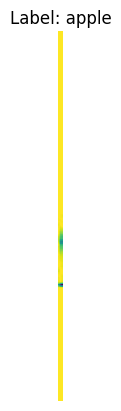

In [ ]:
# Display a single preprocessed image
plt.imshow(X_train[0][0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()


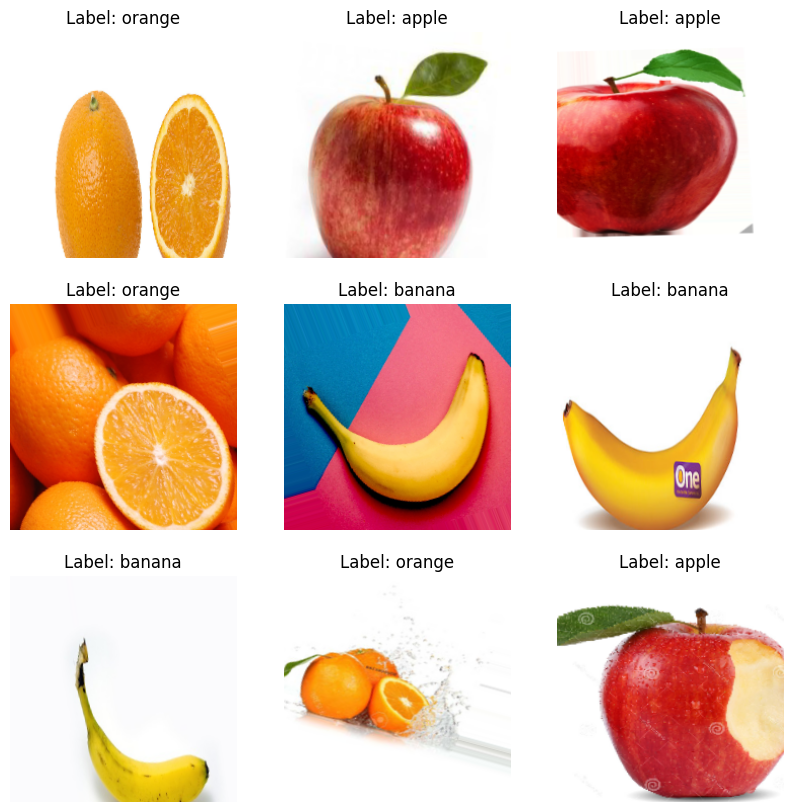

In [ ]:
def display_images(images, labels, num_images=9):
    plt.figure(figsize=(10, 10))

    # Ensure num_images is not larger than the dataset size
    num_images = min(num_images, len(images))

    indices = random.sample(range(len(images)), num_images)
    for i, index in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[index])  # Images are assumed to be preprocessed and not in (image, label) tuples
        plt.title(f'Label: {labels[index]}')
        plt.axis('off')
    plt.show()

# Display a random subset of preprocessed images
display_images(X_train, y_train)

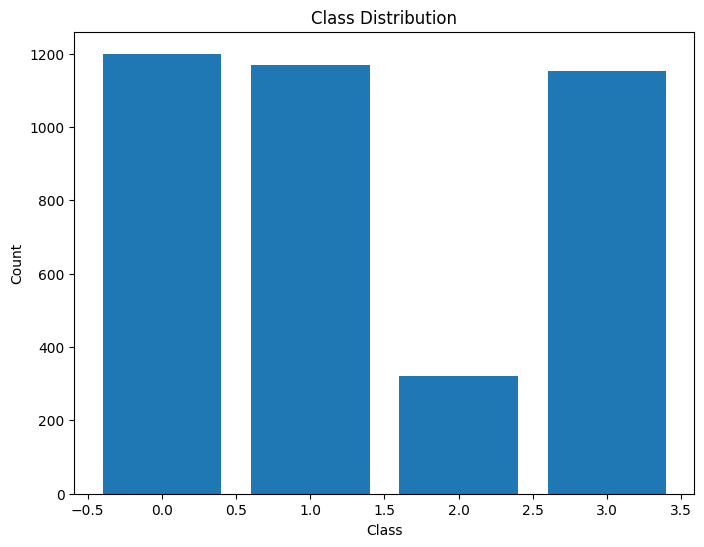

In [ ]:
label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_int = np.array([label_mapping[label] for label in y_train])

# Class Distribution Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(np.unique(y_train_int), np.bincount(y_train_int))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

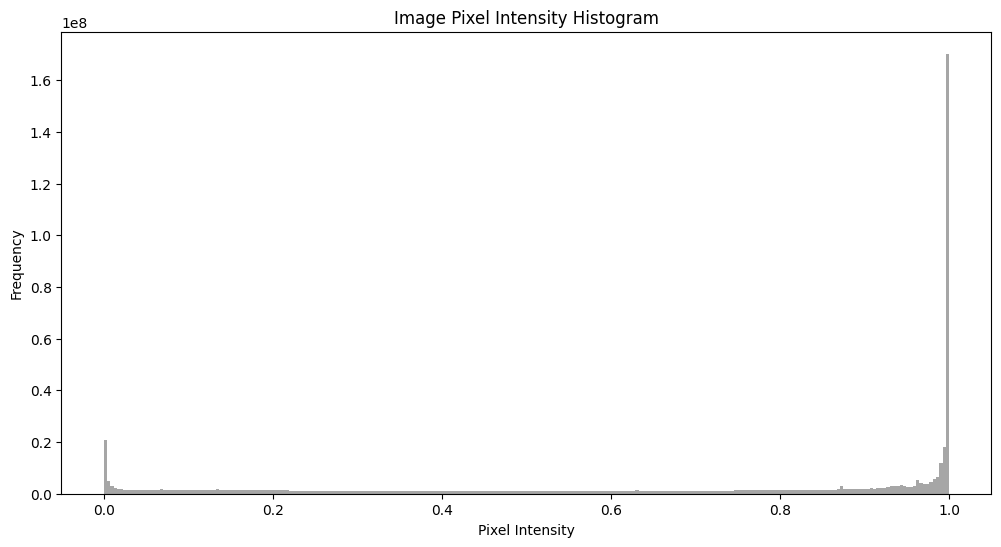

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(X_train.ravel(), bins=256, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Pixel Intensity Histogram')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
num_classes = len(np.unique(y_train_int))

# Define the CNN model
model = models.Sequential()

# Convolutional and Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
import numpy as np
subset_fraction = 0.2

num_samples = int(len(X_train) * subset_fraction)

subset_indices = np.random.choice(len(X_train), num_samples, replace=False)

# Create the subset
X_train_subset = X_train[subset_indices]
y_train_subset = y_train[subset_indices]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_subset)

In [22]:
model.fit(X_train_subset, y_train_encoded, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
39/39 [==============================] - 97s 2s/step - loss: 1.2534 - accuracy: 0.5847 - val_loss: 0.5100 - val_accuracy: 0.7857
Epoch 2/10
39/39 [==============================] - 89s 2s/step - loss: 0.4639 - accuracy: 0.8274 - val_loss: 1.1003 - val_accuracy: 0.7338
Epoch 3/10
39/39 [==============================] - 88s 2s/step - loss: 0.3523 - accuracy: 0.8876 - val_loss: 0.3057 - val_accuracy: 0.9481
Epoch 4/10
39/39 [==============================] - 92s 2s/step - loss: 0.1868 - accuracy: 0.9414 - val_loss: 0.2808 - val_accuracy: 0.9091
Epoch 5/10
39/39 [==============================] - 98s 3s/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.3631 - val_accuracy: 0.9026
Epoch 6/10
39/39 [==============================] - 85s 2s/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.4017 - val_accuracy: 0.9091
Epoch 7/10
39/39 [==============================] - 85s 2s/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.3668 - val_accuracy: 0.9221
Epoch 8/10
39/39 [==

In [ ]:
# test data
test_images = []
test_labels = []


In [ ]:
X_test = np.array(preprocessed_images)
y_test = np.array(preprocessed_labels)

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_train_subset)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_acc}')